In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np

In [3]:
import json

with open('/kaggle/input/mental-health-data/intents.json', 'r') as f:
    data = json.load(f)

df = pd.DataFrame(data['intents'])
df

,tag,patterns,responses
0,greeting,"[Hi, Hey, Is anyone there?, Hi there, Hello, H...",[Hello there. Tell me how are you feeling toda...
1,morning,[Good morning],[Good morning. I hope you had a good night's s...
2,afternoon,[Good afternoon],[Good afternoon. How is your day going?]
3,evening,[Good evening],[Good evening. How has your day been?]
4,night,[Good night],"[Good night. Get some proper sleep, Good night..."
...,...,...,...
75,fact-28,[What do I do if I'm worried about my mental h...,[The most important thing is to talk to someon...
76,fact-29,[How do I know if I'm unwell?],"[If your beliefs , thoughts , feelings or beha..."
77,fact-30,[How can I maintain social connections? What i...,"[A lot of people are alone right now, but we d..."
78,fact-31,[What's the difference between anxiety and str...,[Stress and anxiety are often used interchange...


In [4]:
dic = {"tag":[], "patterns":[], "responses":[]}
for i in range(len(df)):
    ptrns = df[df.index == i]['patterns'].values[0]
    rspns = df[df.index == i]['responses'].values[0]
    tag = df[df.index == i]['tag'].values[0]
    for j in range(len(ptrns)):
        dic['tag'].append(tag)
        dic['patterns'].append(ptrns[j])
        dic['responses'].append(rspns)
        
df = pd.DataFrame.from_dict(dic)
df

,tag,patterns,responses
0,greeting,Hi,[Hello there. Tell me how are you feeling toda...
1,greeting,Hey,[Hello there. Tell me how are you feeling toda...
2,greeting,Is anyone there?,[Hello there. Tell me how are you feeling toda...
3,greeting,Hi there,[Hello there. Tell me how are you feeling toda...
4,greeting,Hello,[Hello there. Tell me how are you feeling toda...
...,...,...,...
227,fact-29,How do I know if I'm unwell?,"[If your beliefs , thoughts , feelings or beha..."
228,fact-30,How can I maintain social connections? What if...,"[A lot of people are alone right now, but we d..."
229,fact-31,What's the difference between anxiety and stress?,[Stress and anxiety are often used interchange...
230,fact-32,What's the difference between sadness and depr...,"[Sadness is a normal reaction to a loss, disap..."


In [5]:
df['tag'].unique()

array(['greeting', 'morning', 'afternoon', 'evening', 'night', 'goodbye',
       'thanks', 'no-response', 'neutral-response', 'about', 'skill',
       'creation', 'name', 'help', 'sad', 'stressed', 'worthless',
       'depressed', 'happy', 'casual', 'anxious', 'not-talking', 'sleep',
       'scared', 'death', 'understand', 'done', 'suicide', 'hate-you',
       'hate-me', 'default', 'jokes', 'repeat', 'wrong', 'stupid',
       'location', 'something-else', 'friends', 'ask', 'problem',
       'no-approach', 'learn-more', 'user-agree', 'meditation',
       'user-meditation', 'pandora-useful', 'user-advice',
       'learn-mental-health', 'mental-health-fact', 'fact-1', 'fact-2',
       'fact-3', 'fact-5', 'fact-6', 'fact-7', 'fact-8', 'fact-9',
       'fact-10', 'fact-11', 'fact-12', 'fact-13', 'fact-14', 'fact-15',
       'fact-16', 'fact-17', 'fact-18', 'fact-19', 'fact-20', 'fact-21',
       'fact-22', 'fact-23', 'fact-24', 'fact-25', 'fact-26', 'fact-27',
       'fact-28', 'fact-29', '

## Exploratory Data Analysis

### Distribution of Intents

In [6]:
import plotly.graph_objects as go

intent_counts = df['tag'].value_counts()
fig = go.Figure(data=[go.Bar(x=intent_counts.index, y=intent_counts.values)])
fig.update_layout(title='Distribution of Intents', xaxis_title='Intents', yaxis_title='Count')
fig.show()

### Pattern and Response analysis

In [7]:
df['pattern_count'] = df['patterns'].apply(lambda x: len(x))
df['response_count'] = df['responses'].apply(lambda x: len(x))
avg_pattern_count = df.groupby('tag')['pattern_count'].mean()
avg_response_count = df.groupby('tag')['response_count'].mean()

fig = go.Figure()
fig.add_trace(go.Bar(x=avg_pattern_count.index, y=avg_pattern_count.values, name='Average Pattern Count'))
fig.add_trace(go.Bar(x=avg_response_count.index, y=avg_response_count.values, name='Average Response Count'))
fig.update_layout(title='Pattern and Response Analysis', xaxis_title='Intents', yaxis_title='Average Count')
fig.show()

## Data Preprocessing

In [9]:
import re
# Preprocessing function
def preprocess_text(s):
    s = re.sub('[^a-zA-Z\']', ' ', s)  # Keep only alphabets and apostrophes
    s = s.lower()  # Convert to lowercase
    s = s.split()  # Split into words
    s = " ".join(s)  # Rejoin words to ensure clean spacing
    return s

# Apply preprocessing to the patterns
df['patterns'] = df['patterns'].apply(preprocess_text)
df['tag'] = df['tag'].apply(preprocess_text)
df

,tag,patterns,responses,pattern_count,response_count
0,greeting,hi,[Hello there. Tell me how are you feeling toda...,2,5
1,greeting,hey,[Hello there. Tell me how are you feeling toda...,3,5
2,greeting,is anyone there,[Hello there. Tell me how are you feeling toda...,16,5
3,greeting,hi there,[Hello there. Tell me how are you feeling toda...,8,5
4,greeting,hello,[Hello there. Tell me how are you feeling toda...,5,5
...,...,...,...,...,...
227,fact,how do i know if i'm unwell,"[If your beliefs , thoughts , feelings or beha...",28,1
228,fact,how can i maintain social connections what if ...,"[A lot of people are alone right now, but we d...",61,1
229,fact,what's the difference between anxiety and stress,[Stress and anxiety are often used interchange...,49,1
230,fact,what's the difference between sadness and depr...,"[Sadness is a normal reaction to a loss, disap...",53,1


In [10]:
len(df['tag'].unique())

50

In [12]:
X = df['patterns']
y = df['tag']

## Build and Train model

#### Model 1: Using a pre-trained model and fine-tuning with the dataset I have

In [37]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sklearn.preprocessing import LabelEncoder
import numpy as np
import torch

# Tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("khalidrizk/autotrain-mental-health-50364120416")
label_encoder = LabelEncoder()

# Encode labels
y_encoded = label_encoder.fit_transform(y)  # y is your target labels
num_labels = len(np.unique(y_encoded))
print(f"Number of unique labels: {num_labels}")

# Load the model with the correct number of labels and ignore mismatched sizes
model = AutoModelForSequenceClassification.from_pretrained(
    "khalidrizk/autotrain-mental-health-50364120416",
    num_labels=num_labels,
    ignore_mismatched_sizes=True  
)

# Encode input texts
def encode_texts(texts, max_len):
    input_ids = []
    attention_masks = []
    for text in texts:
        encoded = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=max_len,
            padding='max_length',  
            truncation=True,       
            return_attention_mask=True,
            return_tensors='pt',
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return torch.cat(input_ids, dim=0), torch.cat(attention_masks, dim=0)

X_encoded, attention_masks = encode_texts(X, max_len=128)  
labels = torch.tensor(y_encoded)

# Verify labels and data alignment
assert labels.max() < num_labels, "Some labels exceed the number of expected classes!"
assert X_encoded.size(0) == labels.size(0), "Mismatch in input and label sizes!"
assert attention_masks.size(0) == labels.size(0), "Mismatch in attention mask and label sizes!"

# Create dataset and dataloaders
dataset = torch.utils.data.TensorDataset(X_encoded, attention_masks, labels)


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning:

`clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884



Number of unique labels: 50


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at khalidrizk/autotrain-mental-health-50364120416 and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([6, 768]) in the checkpoint and torch.Size([50, 768]) in the model instantiated
- classifier.bias: found shape torch.Size([6]) in the checkpoint and torch.Size([50]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [38]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

epochs = 10
for epoch in range(epochs):
    model.train()
    total_train_loss = 0
    for batch in train_dataloader:
        b_input_ids, b_input_mask, b_labels = tuple(t.to(device) for t in batch)
        model.zero_grad()        
        outputs = model(b_input_ids, attention_mask=b_input_mask, labels=b_labels)
        loss = outputs[0]
        total_train_loss += loss.item()
        loss.backward()
        optimizer.step()
    avg_train_loss = total_train_loss / len(train_dataloader)            
    print(f"Epoch {epoch+1}, Average Training Loss: {avg_train_loss:.2f}")

Epoch 1, Average Training Loss: 3.93
Epoch 2, Average Training Loss: 3.93
Epoch 3, Average Training Loss: 3.94
Epoch 4, Average Training Loss: 3.92
Epoch 5, Average Training Loss: 3.94
Epoch 6, Average Training Loss: 3.93
Epoch 7, Average Training Loss: 3.93
Epoch 8, Average Training Loss: 3.93
Epoch 9, Average Training Loss: 3.92
Epoch 10, Average Training Loss: 3.93


In [39]:
def predict_intent(text):
    encoded_dict = tokenizer.encode_plus(
        text,                      
        add_special_tokens=True,   
        max_length=max_len,        
        pad_to_max_length=True,    
        return_attention_mask=True,
        return_tensors='pt',       
    )
    
    input_ids = encoded_dict['input_ids'].to(device)
    attention_mask = encoded_dict['attention_mask'].to(device)

    with torch.no_grad():
        # Forward pass, calculate logit predictions
        outputs = model(input_ids, token_type_ids=None, attention_mask=attention_mask)
    
    logits = outputs[0]

    logits = logits.detach().cpu().numpy()

    probabilities = torch.nn.functional.softmax(torch.tensor(logits), dim=1).numpy()

    predicted_label_idx = np.argmax(probabilities, axis=1).flatten()
    
    predicted_label = label_encoder.inverse_transform(predicted_label_idx)[0]
    
    return predicted_label, probabilities[0][predicted_label_idx]

In [25]:
import re
import random
import torch
import numpy as np

def chatbot():
    print("Chatbot: Hello! I am your assistant. Type 'quit' to end the conversation.")
    while True:
        # Get user input
        user_input = input("You: ")
        
        # Exit condition
        if user_input.lower() == 'quit':
            print("Chatbot: Goodbye! Have a great day!")
            break
        
        # Preprocess the input
        txt = re.sub('[^a-zA-Z\']', ' ', user_input)  
        txt = txt.lower().strip()  

        encoded_dict = tokenizer.encode_plus(
            txt,
            add_special_tokens=True,
            max_length=128,  # Max sequence length
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='pt',
        )
        
        input_ids = encoded_dict['input_ids'].to(device)
        attention_mask = encoded_dict['attention_mask'].to(device)

        with torch.no_grad():
            outputs = model(input_ids, attention_mask=attention_mask)
        
        logits = outputs[0]
        probabilities = torch.nn.functional.softmax(logits, dim=1).cpu().numpy()
        
        # Get the predicted label
        predicted_label_idx = np.argmax(probabilities, axis=1)[0]
        confidence = probabilities[0][predicted_label_idx] * 100  
        tag = label_encoder.inverse_transform([predicted_label_idx])[0]

        # Fetch a response
        if tag in df['tag'].values:
            responses = df[df['tag'] == tag]['responses'].values[0]
            response = random.choice(responses)
        else:
            response = "I'm not sure how to respond to that. Can you rephrase?"

        # Print the chatbot's response
        print(f"Chatbot: {response} (Predicted Intent: {tag}, Confidence: {confidence:.2f}%)")

# Start the chatbot
chatbot()


Chatbot: Hello! I am your assistant. Type 'quit' to end the conversation.


You:  I want some help


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2870: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).



Chatbot: I'm here for you. Could you tell me why you're feeling this way? (Predicted Intent: sad, Confidence: 4.33%)


You:  I feel depressed


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2870: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).



Chatbot: Oh I see. Do you want to talk about something? (Predicted Intent: neutral response, Confidence: 4.49%)


You:  I had a bad day at school


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2870: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).



Chatbot: i first want to let you know that you are not alone in your feelings and there is always someone there to help . you can always change your feelings and change your way of thinking by being open to trying to change. (Predicted Intent: worthless, Confidence: 4.37%)


You:  what should I do to overcome this feeling?


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2870: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).



Chatbot: Next, I would suggest you to practice meditation. Meditation can produce a deep state of relaxation and a tranquil mind. (Predicted Intent: user agree, Confidence: 4.89%)


You:  ok thanks!


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2870: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).



Chatbot: Oh I see. Do you want to talk about something? (Predicted Intent: neutral response, Confidence: 3.65%)


You:  nothing else for now


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2870: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).



Chatbot: Did something happen which made you feel this way? (Predicted Intent: happy, Confidence: 4.15%)


You:  quit


Chatbot: Goodbye! Have a great day!


#### Model 2: Using BERT base

In [50]:
import torch
from torch.utils.data import DataLoader, Dataset, random_split
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from sklearn.preprocessing import LabelEncoder
import numpy as np


# Tokenization and Encoding the Data
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
max_len = 128  # Max sequence length

def encode_texts(texts, max_len):
    input_ids = []
    attention_masks = []
    
    for text in texts:
        encoded_dict = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=max_len,
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='pt',
        )
        input_ids.append(encoded_dict['input_ids'])
        attention_masks.append(encoded_dict['attention_mask'])
    
    return torch.cat(input_ids, dim=0), torch.cat(attention_masks, dim=0)


# Encoding labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
num_labels = len(np.unique(y_encoded))

# Encode the patterns
input_ids, attention_masks = encode_texts(X, max_len)
labels = torch.tensor(y_encoded)

# Splitting the dataset into training and validation
dataset = torch.utils.data.TensorDataset(input_ids, attention_masks, labels)
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=16)
validation_dataloader = DataLoader(val_dataset, batch_size=16)

model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_labels)
optimizer = AdamW(model.parameters(), lr=2e-5)
        

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning:

`clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2870: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longes

In [51]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

epochs = 10
for epoch in range(epochs):
    model.train()
    total_train_loss = 0
    for batch in train_dataloader:
        b_input_ids, b_input_mask, b_labels = tuple(t.to(device) for t in batch)
        model.zero_grad()        
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
        loss = outputs[0]
        total_train_loss += loss.item()
        loss.backward()
        optimizer.step()
    avg_train_loss = total_train_loss / len(train_dataloader)            
    print(f"Epoch {epoch+1}, Average Training Loss: {avg_train_loss:.2f}")

Epoch 1, Average Training Loss: 3.94
Epoch 2, Average Training Loss: 3.75
Epoch 3, Average Training Loss: 3.58
Epoch 4, Average Training Loss: 3.30
Epoch 5, Average Training Loss: 3.11
Epoch 6, Average Training Loss: 2.90
Epoch 7, Average Training Loss: 2.71
Epoch 8, Average Training Loss: 2.59
Epoch 9, Average Training Loss: 2.43
Epoch 10, Average Training Loss: 2.28


In [52]:
def predict_intent(text):
    # Tokenize and encode the text for BERT
    encoded_dict = tokenizer.encode_plus(
        text,                      # Input text
        add_special_tokens=True,   # Add '[CLS]' and '[SEP]'
        max_length=max_len,        # Pad or truncate to max length
        pad_to_max_length=True,    # Pad to max length
        return_attention_mask=True,# Construct attn. masks
        return_tensors='pt',       # Return pytorch tensors
    )
    
    # Extract input IDs and attention masks from the encoded representation
    input_ids = encoded_dict['input_ids'].to(device)
    attention_mask = encoded_dict['attention_mask'].to(device)

    # No gradient calculation needed
    with torch.no_grad():
        # Forward pass, calculate logit predictions
        outputs = model(input_ids, token_type_ids=None, attention_mask=attention_mask)
    
    logits = outputs[0]

    # Move logits and labels to CPU
    logits = logits.detach().cpu().numpy()

    # Use softmax to calculate probabilities
    probabilities = torch.nn.functional.softmax(torch.tensor(logits), dim=1).numpy()


    # Get the predicted label with the highest probability
    predicted_label_idx = np.argmax(probabilities, axis=1).flatten()
    
    # Decode the predicted label
    predicted_label = label_encoder.inverse_transform(predicted_label_idx)[0]
    
    return predicted_label, probabilities[0][predicted_label_idx]

Chatbot: Hello! I am your assistant. Type 'quit' to end the conversation.


You:  hi, i need some help


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2870: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).



Chatbot: Hi there. What brings you here today?


You:  I feel a little sad lately


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2870: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).



Chatbot: I'm sorry to hear that. I'm here for you. Talking about it might help. So, tell me why do you think you're feeling this way?


You:  i am not doing well at school


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2870: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).



Chatbot: That seem awful. What do you think is behind this?


You:  i am not scoring well


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2870: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).



Chatbot: Why do you think you feel this way?


You:  i have been concentrating on sports and mental health at school


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2870: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).



Chatbot: Mental health includes our emotional, psychological, and social well-being. It affects how we think, feel, and act. It also helps determine how we handle stress, relate to others, and make choices.


You:  yes that's true


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2870: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).



Chatbot: Can you elaborate on that?


You:  I do not know how to overcome this feeling


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2870: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).



Chatbot: I'm sorry to hear that. I'm here for you. Talking about it might help. So, tell me why do you think you're feeling this way?


You:  what do you suggest i do?


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2870: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).



Chatbot: Mental health is a state of well-being in which the individual realizes his or her own abilities, can cope with the normal stresses of life, can work productively and fruitfully, and is able to make a contribution to his or her community


You:  true. i will figure out a way


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2870: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).



Chatbot: I'm listening. Please go on.


You:  quit


Chatbot: Goodbye! Let me summarize your conversation with a mood chart!


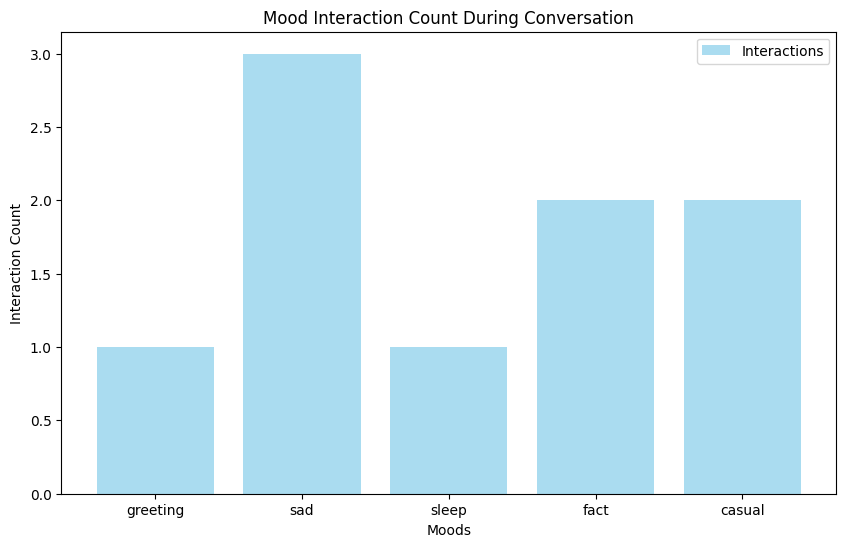

In [82]:
import re
import random
import torch
from transformers import BertTokenizer, BertForSequenceClassification
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# Initialize a mood log
mood_log = defaultdict(list)

def chatbot():
    print("Chatbot: Hello! I am your assistant. Type 'quit' to end the conversation.")
    global mood_log
    interaction_count = 0

    while True:
        # Get user input
        user_input = input("You: ")
        
        # Exit condition
        if user_input.lower() == 'quit':
            print("Chatbot: Goodbye! Let me summarize your conversation with a mood chart!")
            plot_mood_chart(mood_log)
            break
        
        # Preprocess the input
        txt = re.sub('[^a-zA-Z\']', ' ', user_input)  
        txt = txt.lower().strip()  

        # Tokenize and encode the input for BERT
        encoded_dict = tokenizer.encode_plus(
            txt,
            add_special_tokens=True,
            max_length=128,  # Max sequence length
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='pt',
        )
        
        # Move tensors to the appropriate device
        input_ids = encoded_dict['input_ids'].to(device)
        attention_mask = encoded_dict['attention_mask'].to(device)

        # Predict the intent
        with torch.no_grad():
            outputs = model(input_ids, attention_mask=attention_mask)
        
        logits = outputs[0]
        probabilities = torch.nn.functional.softmax(logits, dim=1).cpu().numpy()
        
        # Get the predicted label
        predicted_label_idx = np.argmax(probabilities, axis=1)[0]
        confidence = probabilities[0][predicted_label_idx] * 100  # Confidence score in percentage
        tag = label_encoder.inverse_transform([predicted_label_idx])[0]

        # Log the mood
        interaction_count += 1
        mood_log[tag].append(confidence)

        # Fetch a response
        if tag in df['tag'].values:
            responses = df[df['tag'] == tag]['responses'].values[0]
            response = random.choice(responses)
        else:
            response = "I'm not sure how to respond to that. Can you rephrase?"

        # Print the chatbot's response
        print(f"Chatbot: {response}")

# Function to plot the mood chart
def plot_mood_chart(mood_log):
    moods = list(mood_log.keys())
    avg_confidences = [np.mean(mood_log[mood]) for mood in moods]
    interaction_counts = [len(mood_log[mood]) for mood in moods]

    # Create a bar chart for interaction counts
    plt.figure(figsize=(10, 6))
    plt.bar(moods, interaction_counts, color='skyblue', alpha=0.7, label="Interactions")
    plt.ylabel("Interaction Count")
    plt.xlabel("Moods")
    plt.title("Mood Interaction Count During Conversation")
    plt.legend()
    plt.show()

# Start the chatbot
chatbot()
